In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:29<00:00, 41.1MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [6]:
validion_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [7]:
def process (image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validion_ds=validion_ds.map(process)

In [8]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(train_ds,epochs=5,validation_data=validion_ds)

Epoch 1/5
625/625 [==============================] - 77s 107ms/step - loss: 1.4117 - accuracy: 0.5854 - val_loss: 0.7255 - val_accuracy: 0.5396
Epoch 2/5
625/625 [==============================] - 67s 107ms/step - loss: 0.5848 - accuracy: 0.6947 - val_loss: 0.5271 - val_accuracy: 0.7358
Epoch 3/5
625/625 [==============================] - 67s 107ms/step - loss: 0.4848 - accuracy: 0.7623 - val_loss: 0.5584 - val_accuracy: 0.7036
Epoch 4/5
625/625 [==============================] - 65s 104ms/step - loss: 0.4173 - accuracy: 0.8076 - val_loss: 0.4942 - val_accuracy: 0.7542
Epoch 5/5
625/625 [==============================] - 65s 104ms/step - loss: 0.3635 - accuracy: 0.8385 - val_loss: 0.4443 - val_accuracy: 0.7982


In [11]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [16]:
df=cv2.imread("/content/download.jfif")

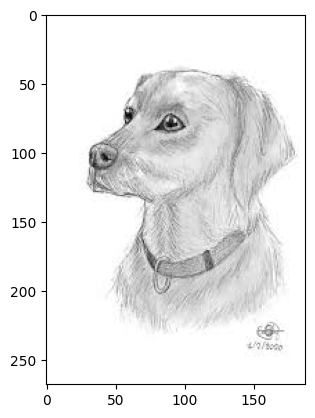

In [17]:
plt.imshow(df)

In [18]:
df.shape

(268, 188, 3)

In [19]:
test_image=cv2.resize(df,(256,256))

In [20]:
img_input=test_image.reshape((1,256,256,3))

In [21]:
model.predict(img_input)

1/1 [==============================] - 1s 953ms/step


array([[1.]], dtype=float32)